In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
plt.rcdefaults()

In [4]:
#Access input folder
input_dir1 = Path ("G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

input G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset
2 [WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_1'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_13'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_17'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_21'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_25'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_29'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_33'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_37'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_

In [6]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Mass', 'Standoff distance', 'Time', 'Phase', 'Pressure'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx") if 5 <= int(file_train.stem))
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

df = pd.concat(df_list_train, ignore_index = True)

folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1
11
13
15
17
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_13
11
13
15
17
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_17
11
13
15
17
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_21
11
13
15
17
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_25
11
13
15
17
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_29
11
13
15
17
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_33
11
13
15
17
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_37
11
13
15
17
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_tim

C:\Users\z5379606\AppData\Local\Temp\ipykernel_27148\1683007883.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')


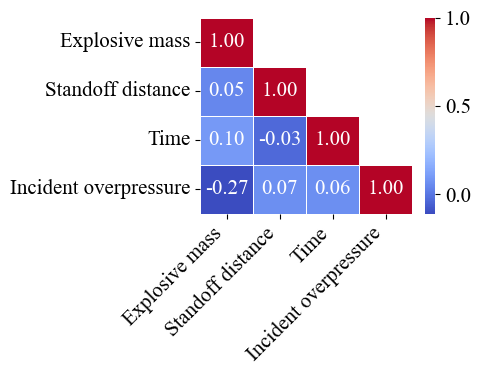

In [7]:
# Define the new column headers
new_headers = ['Explosive mass', 'Standoff distance', 'Time', 'Phase', 'Incident overpressure']  # Adjust as per the number of columns in your DataFrame

# Assign the new headers to the DataFrame
df.columns = new_headers

# Calculate the Spearman correlation matrix
spearman_corr = df.corr(method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(spearman_corr, dtype=bool), k=1)

# Set global font to Times New Roman (optional for aesthetics)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 15

# Plot the heatmap using seaborn with the mask
plt.figure(figsize=(5, 4))
sns.heatmap(spearman_corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,  vmin=-0.11, vmax=1)

# Add a title and labels
#plt.title('Spearman Correlation Coefficient Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.tight_layout()
# Save the plot as an image
plt.savefig('IP_Section1_info.png', dpi=200, facecolor='white', bbox_inches='tight')
plt.show()